In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Kostky

In [2]:
k = pd.read_csv("kostky.csv")

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
hodnota
2      21
3      59
4      75
5     110
6     150
7     163
8     128
9     122
10     89
11     49
12     34
Name: hodnota, dtype: int64


<Axes: >

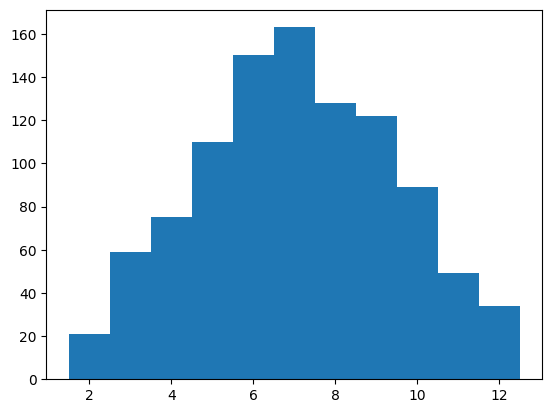

In [3]:
# limity pro chlivecky histogramu
b = list(range(2, 14))
print(b)
# ciselna reprezentace hodu
print(k.groupby('hodnota')["hodnota"].count())
k['hodnota'].hist(bins=b, align='left', grid=False, )

# Callcentrum

In [4]:
cc = pd.read_csv("callcentrum.csv")

Mame nekolik moznosti, jak ziskat delku volani ve vterinach.
1. rozdeleni do sloupcu a nasledny vypocet do dalsiho:

In [5]:
# str.split (metoda typu pandas.core.series.Series) ma specialni parametr 'expand', ktery vytvori ze seznamu samostatne sloupce a ty pretypujeme z retezcu na cisla
cc[['m', 's']] = cc["hodnota"].str.split(':', expand=True).astype(int)
# ktera pak vhodne secteme
cc['sec'] = cc['m'] * 60 + cc['s']


2. vytvoreni vlastni funkce, kterou budeme na vsechny hodnoty aplikovat:

In [6]:
def str2sec(cas):
    casspl = cas.split(':')
    return 60 * int(casspl[0]) + int(casspl[1])

cc['sec'] = cc['hodnota'].apply(str2sec)

3. pouziti [lambda (anonymni) funkce](https://en.wikipedia.org/wiki/Anonymous_function) - metode `apply()` dame jako parametr primo definici jednoduche funkce (v Pythonu nesmi obsahovat zadne prirazeni). Napr.: `lambda x: (x**2)/2` spocte pro cislo `x` polovinu druhe mocniny. V nasem pripade budemem chtit neco jako (paramterem bude seznam vytvoreny `split()`em):

In [7]:
cc['sec'] = cc['hodnota'].str.split(":").apply(lambda x: int(x[0])*60 + int(x[1]))

1. mene programovani, vic dat
2. nejflexibilnejsi, dobre osetrime pripady, kdy bude vstup jiny nez, ve formatu mm:ss, pripadne muzeme vratit NaN (presneji `numpy.NaN`), kdyz bude vstup chybny. Obvykle take nejrychlejsi
3. nejkratsi

### Histogram

array([[<Axes: title={'center': 'sec'}>]], dtype=object)

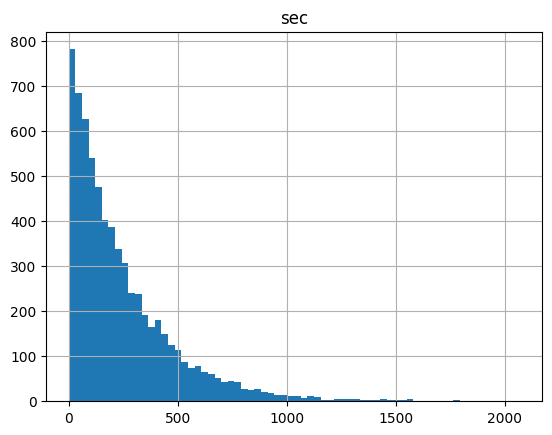

In [8]:
# jako pocet prihradek si vezmeme maximalni delku hovoru delenou 30, jinymi slovy 30-vterinove intervaly
# obecnejsi diskuse https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width
cc[['sec']].hist(bins=int(cc['sec'].max()/30))

array([[<Axes: title={'center': 'sec'}>]], dtype=object)

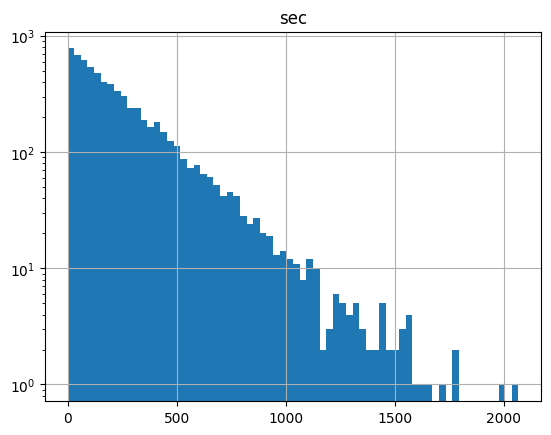

In [9]:
# ... a kdyz pouzijeme logaritmickou skalu, uvidime, ze pocet hovoru s jejich delkou exponencialne ubyva :)
cc[['sec']].hist(bins=int(cc['sec'].max()/30), log=True)

### Boxplot

<Axes: >

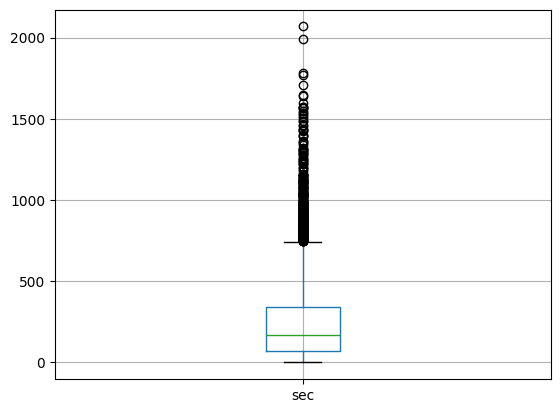

In [10]:
cc[['sec']].boxplot()

Body lezici prilis daleko za hranicemi (zde konkretne 1.5 rozsahu dvou prostrednich kvartilu) nam ukazuji, ze data maji "ocas". Muzeme je schovat, pripadne zmenit parametr `whiskers`. Ovsem schovanim prichazime o vizualni feedback ohledne tech odlehlych dat.

<Axes: >

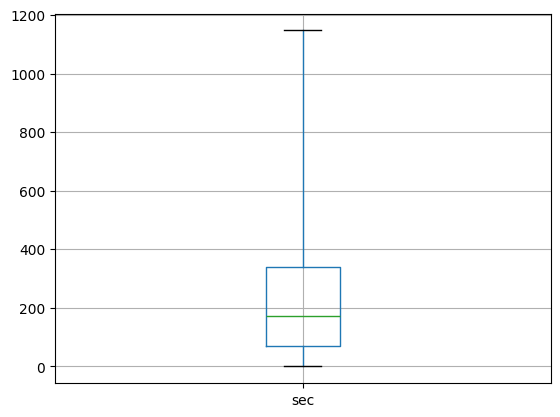

In [11]:
cc[['sec']].boxplot(whis=3, showfliers=False)

# Snih

In [12]:
snih = [
    [1968, 480, 351],
    [1969, 462, 663],
    [1970, 443, 490],
    [1971, 518, 444],
    [1972, 537, 420],
    [1973, 446, 941],
    [1974, 446, 691],
    [1975, 450, 477],
    [1976, 356, 395],
    [1977, 381, 652],
    [1978, 345, 525],
    [1979, 430, 762],
    [1980, 266, 316],
    [1981, 533, 781],
    [1982, 471, 769],
    [1983, 407, 801],
    [1984, 526, 633],
    [1985, 391, 488],
    [1986, 361, 624],
    [1987, 470, 471],
    [1988, 506, 514],
    [1989, 333, 208],
    [1990, 462, 909],
    [1991, 438, 443],
    [1992, 364, 488],
    [1993, 452, 579],
    [1994, 484, 519],
    [1995, 460, 809],
    [1996, 465, 682],
    [1997, 431, 814],
    [1998, 463, 595],
    [1999, 460, 512],
    [2000, 503, 750],
    [2001, 462, 951],
    [2002, 429, 413],
    [2003, 405, 738],
    [2004, 477, 777],
    [2005, 385, 316],
    [2006, 368, 417],
    [2007, 513, 635],
    [2008, 448, 689],
    [2009, 525, 443],
    [2010, 427, 225],
    [2011, 460, 618],
    [2012, 417, 742],
    [2013, 517, 247],
    [2014, 466, 552],
    [2015, 523, 441],
    [2016, 422, 690],
    [2017, 420, 699]
]
s = pd.DataFrame(snih, columns=['rok', 'hora', 'udoli']).set_index('rok')

<Axes: >

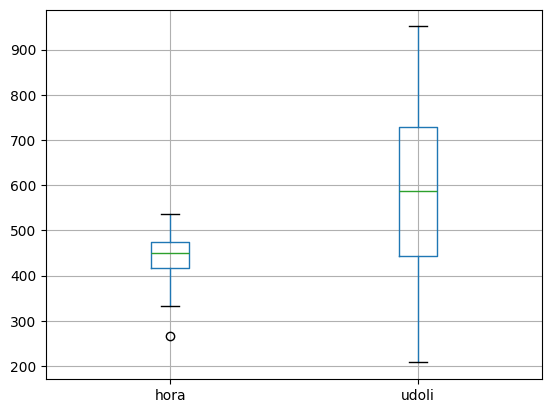

In [13]:
s.boxplot()

Boxplot je pekny, ale nedava nam uplne informaci o casovem prubehu - nepoznam z neho, jak se veci mely poslednich par let. Takze se nejdriv podivame na uplne jednoduchy graf:

<Axes: xlabel='rok'>

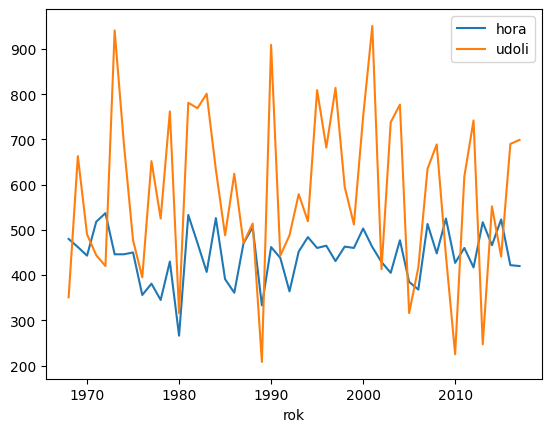

In [14]:
s.plot()

... a uvidime, ze to neni uplne slava, protoze hodnoty litaji nahoru a dolu. Na tento problem se (hlavne u casovych rad) muze hodit pouzit [klouzavy prumer](https://cs.wikipedia.org/wiki/Klouzav%C3%BD_pr%C5%AFm%C4%9Br). Ten si vytovirme pomoci metod dataframu `rolling()` a `mean()`.
**`rolling(n)`** pri prochazeni dataframu vrati `n` predchazejicich (vcetne aktualni) hodnot a `mean()` z nich pak 
spocita prumer. A to se stane pro kazdou radku dataframu. Takze treba prumerne hodnoty za predchazejicich 15 let pro obe zimoviska muzeme spocitat:
```
s[["h15", "u15"]] = s[["h", "u"]].rolling(15).mean()
```
... sloupce `"h15"` a `"u15"` pak budou obsahovat prumery pro data ve sloupcich `"h"` a `"u"`.

<Axes: xlabel='rok'>

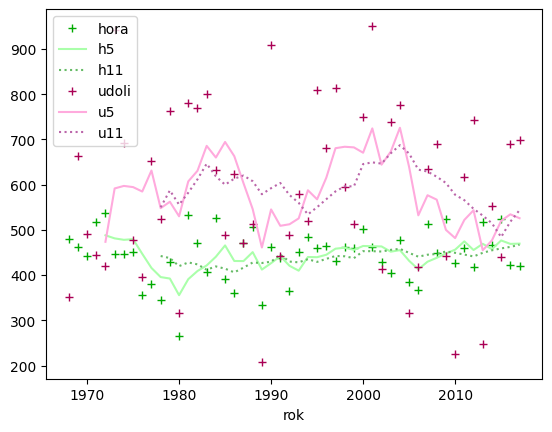

In [15]:
# spocteme si rovnou klouzave prumery za 5, 7, 11 a 22 let - 11 je delka slunecniho cyklu
for n in [5, 7, 11, 22]:
    s["u"+str(n)] = s["udoli"].rolling(n).mean()
    s["h"+str(n)] = s["hora"].rolling(n).mean()
# styly linek/bodu: https://www.geeksforgeeks.org/line-plot-styles-in-matplotlib/
linestyle = ["+", "-", ":", "+", "-", ":"]
# barvy
colors = ["#0a0", "#afa", "#6b6", "#a05", "#fad", "#b6a"]
s[['hora', 'h5', 'h11', 'udoli', 'u5', 'u11']].plot(color=colors, style=linestyle)


Pozorovani: rada prumeru zacina az ve chvili, kdy je k duispozici dostatecny pocet dat, tedy napr. `'h11'` zacina se oproti `'h5'` o sest let pozdeji.